## 프로그래밍3 기말 대체과제
### - 이동통신 사용자 데이터 분석하기

## 201884054 조서연

In [1]:
import pandas as pd
import numpy as np

## 1. 데이터 설명

#### 사용할 데이터 : 이동통신 사용자 데이터

#### 데이터 컬럼 정보
- Leave = 가입해지여부(1이면 해지)

- MemberWeeks = 가입기간

- NewContract = 가입갱신여부(1이면 갱신)

- IsData = 데이터요금제사용여부(1이면 사용)

- DataAmount = 데이터사용량(GB)

- Callcenter = 고객센터전화량

- CalMins = 월평균전화량(분)

- CalCounts = 월평균전화수(횟수)

- MonthlyFee = 월평균요금

- OverFee = 초과요금

- RoamingMin = 로밍시간(분)

In [2]:
# 데이터 불러오기

telco = pd.read_csv('data/telco.csv', encoding='cp949')
telco.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


-----------------------------------------------------------------

## 2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

#### 탐색적 데이터 분석은 데이터를 만나면 가장 먼저 하는 일로, 데이터의 특성 을 정리 및 요약하고 시각화하는 과정을 말한다.

#### 데이터 정보 확인 > 데이터 메모리 줄이기 > 데이터 전처리 > 전체적인 데이터 확인을 위한 간단한 시작화

In [3]:
# 데이터 정보 탐색하기

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


데이터는 총 11개의 컬럼을 가지고 있으며 모두 int타입과 float타입의 형태로 구성되어 있다.

데이터를 사용하기 전 데이터의 불필요한 메모리를 줄이기 위해

수치를 먼저 확인을 한다.

In [4]:
# 통계함수를 이용해 min과 max값 확인

telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


통계함수로 각 컬럼의 값을 확인한 결과 min과 max값이 데이터 타입에 비해 상당히 작기 때문에

데이터 타입을 재정의 해서 데이터를 불러오기로 한다.

In [5]:
# 메모리 아끼기 - 데이터 형식변환

telco['Leave'] = telco['Leave'].astype(np.int16)
telco['MemberWeeks'] = telco['MemberWeeks'].astype(np.int16)
telco['NewContract'] = telco['NewContract'].astype(np.int16)
telco['IsData'] = telco['IsData'].astype(np.int16)
telco['Callcenter'] = telco['Callcenter'].astype(np.int16)
telco['CalCounts'] = telco['CalCounts'].astype(np.int16)
telco['DataAmount'] = telco['DataAmount'].astype(np.float16)
telco['CalMins'] = telco['CalMins'].astype(np.float16)
telco['MonthlyFee'] = telco['MonthlyFee'].astype(np.float16)
telco['OverFee'] = telco['OverFee'].astype(np.float16)
telco['RoamingMin'] = telco['RoamingMin'].astype(np.float16)

na값이 있다면 int8, float8은 계산 할 수 없고, 컬럼의 값들 모두가 int16과 float16 범위 안에 들어가므로

각 컬럼들의 타입을 int64 -> int16, float64 -> float16으로 바꿔주었다.

In [6]:
# 각 컬럼들의 메모리 확인

telco.memory_usage(deep=True)

Index           128
Leave          6666
MemberWeeks    6666
NewContract    6666
IsData         6666
DataAmount     6666
Callcenter     6666
CalMins        6666
CalCounts      6666
MonthlyFee     6666
OverFee        6666
RoamingMin     6666
dtype: int64

In [7]:
# 데이터 전체 메모리 확인

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int16  
 1   MemberWeeks  3333 non-null   int16  
 2   NewContract  3333 non-null   int16  
 3   IsData       3333 non-null   int16  
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   int16  
 6   CalMins      3333 non-null   float16
 7   CalCounts    3333 non-null   int16  
 8   MonthlyFee   3333 non-null   float16
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(5), int16(6)
memory usage: 71.7 KB


타입을 변경한 결과 메모리 사용량이 4분의 1로 줄은 것을 알 수 있다.

In [8]:
# 상위 최대 값들과 최소 값들 확인하기
# 시각화에 들어가기 전 데이터의 최대 최소값들을 확인해보기
# 가입기간이 가장 오래된 사람들 100명 뽑기

telco.nlargest(100, 'MemberWeeks').head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
817,0,243,1,0,0.000000,2,95.500,92,31.00000,8.187500,6.601562
1408,0,232,1,0,0.140015,1,165.625,104,46.40625,9.796875,11.796875
1551,1,225,1,0,0.300049,0,165.375,106,55.00000,13.687500,8.703125
1751,0,225,1,0,0.000000,1,182.750,142,53.00000,12.328125,8.796875
416,1,224,0,0,0.260010,1,171.500,99,45.59375,8.000000,5.000000


In [9]:
# 가입기간이 가장 오래 된 100명 중 월 평균 요금이 적은 5명의 데이터 출력

telco.nlargest(100, 'MemberWeeks').nsmallest(5, 'MonthlyFee')

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
2303,0,205,1,0,0.320068,2,49.90625,123,25.203125,7.539062,10.101562
238,0,215,1,0,0.310059,0,83.62500,148,28.093750,6.050781,10.703125
1466,0,195,1,0,0.000000,0,63.18750,108,30.000000,11.007812,5.101562
817,0,243,1,0,0.000000,2,95.50000,92,31.000000,8.187500,6.601562
1327,1,193,1,0,0.290039,2,96.81250,92,31.906250,7.128906,10.898438


최대, 최소를 찾아주는 메서드를 이용하면 sort_value를 사용하지 않아도 간단하게 원하는 결과를 찾을 수 있다.

수치만으로 데이터를 확인하기엔 어려움이 있으니

간단한 시각화를 통해 데이터의 전체적인 구성을 확인한다.

사용하는 데이터는 object타입의 데이터는 없지만 여부를 보여주는 0과 1로 이루어진 데이터는 존재한다.

- Leave = 가입해지여부(1이면 해지)

- NewContract = 가입갱신여부(1이면 갱신)

- IsData = 데이터요금제사용여부(1이면 사용)

해당 데이터들로 사용자 분포가 어떻게 되는지 count하여 막대 그래프를 그려보려고 한다.

In [10]:
# 가입해지여부 분포 확인

telco.Leave.value_counts()

0    2850
1     483
Name: Leave, dtype: int64

In [11]:
# 결측치 확인

telco.Leave.isna().sum()

0

<BarContainer object of 2 artists>

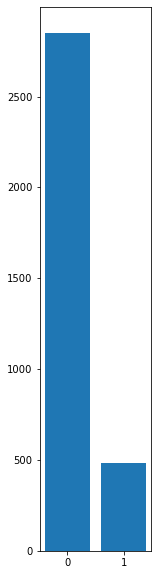

In [12]:
# matplotlib 이용
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 10))
plt.bar(telco.Leave.value_counts().index, telco.Leave.value_counts())

여기서 0은 가입자를 가르키고, 1은 해지자를 가르킨다.

가입자 수가 해지자 수에 비해 상당히 많은 것을 알 수 있다.

In [13]:
# 가입 갱신자 여부 분포 확인

telco.NewContract.value_counts()

1    3010
0     323
Name: NewContract, dtype: int64

In [14]:
# 결측치 확인

telco.NewContract.isna().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='NewContract'>

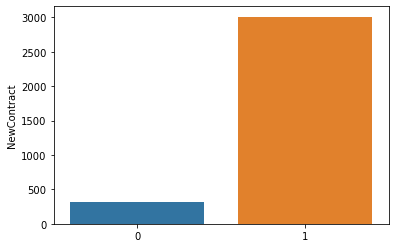

In [15]:
# seaborn 이용
import seaborn as sns

sns.barplot(telco.NewContract.value_counts().index, telco.NewContract.value_counts())

여기서 가입 갱신자는 1을 가르키며 0은 비갱신자를 가르킨다.

가입 갱신자가 비갱신자에 비해 상당히 많은 것을 알 수 있다.

In [16]:
# 다음은 고객센터 통화수 분포를 알아보고자 한다

telco.Callcenter.value_counts(dropna=False)

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Callcenter, dtype: int64

<AxesSubplot:>

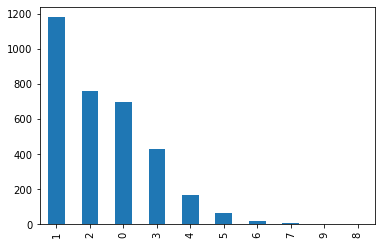

In [17]:
# 간단한 plot함수를 이용

telco.Callcenter.value_counts(dropna=False).plot(kind='bar')

그래프의 결과를 보면 1번이나 2번 고객센터에 통화한 고객이 제일 많고

다음은 아예 고객센터에 통화를 하지 않은 수가 많았다.

상당 수의 고객들이 고객센터 통화를 잘 하지 않는 것을 알 수 있다.

---------------------------------------------------------

몇 개의 컬럼들을 살펴보고 데이터를 탐색해 보았다.

본격적으로 데이터 분석을 해보면서 데이터로부터 의미있는 결과를 도출해보려고 한다.

## 3. 데이터 분석

#### 데이터 분석을 통해 데이터를 용이하게 변환하고 데이터로부터 의미 있는 결과를 도출하는 것이 목적이다.
- 데이터 전처리 및 정제
- 시각화를 통해 데이터를 이해하기

In [18]:
# 먼저 데이터 분석에 앞서 na값을 확인하기 위한 과정을 거친다.

telco.isna().sum()

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

결측치가 존재하지 않으므로 결측치 처리 과정은 생략한다.

In [19]:
# 연속형 데이터(수치)의 분포도를 그려보기

telco.MemberWeeks.value_counts(dropna=False)

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: MemberWeeks, Length: 212, dtype: int64

가입기간을 살펴본 결과 연속형 수치 데이터 인 것을 확인 할 수 있다.

그래서 count를 하여 막대그래프로 나타내는 것보다 hist() 그래프로 전체적인 연속형 범위를 확인하는 것이 좋다. 

<AxesSubplot:>

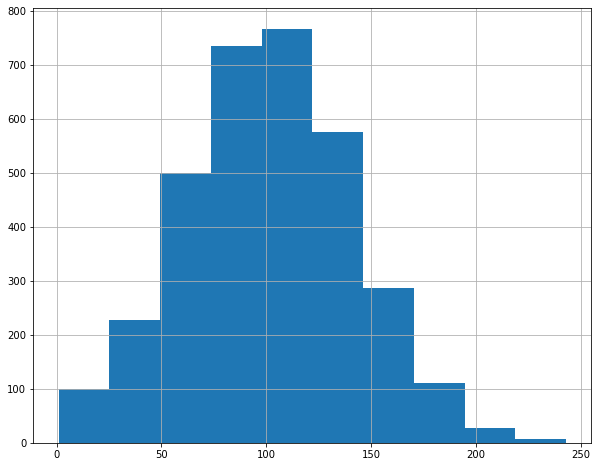

In [20]:
# histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
telco.MemberWeeks.hist(ax=ax)

<AxesSubplot:>

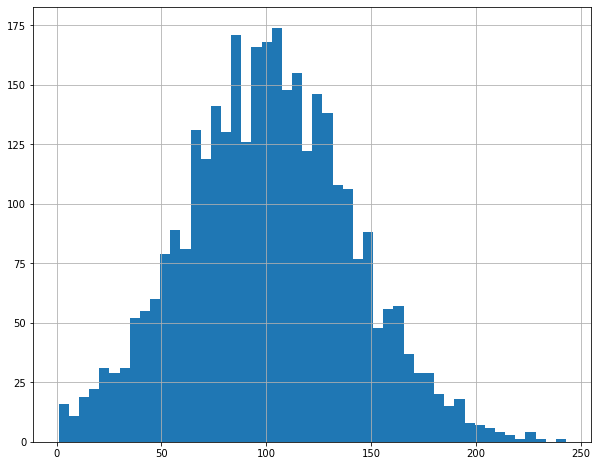

In [21]:
# 막대 그래프가 두꺼워서 세부적인 모양을 보기 어려우니 bin의 갯수를 늘려서 다시 확인한다.

fig, ax = plt.subplots(figsize=(10, 8))
telco.MemberWeeks.hist(ax=ax, bins=50)

<AxesSubplot:xlabel='MemberWeeks', ylabel='Count'>

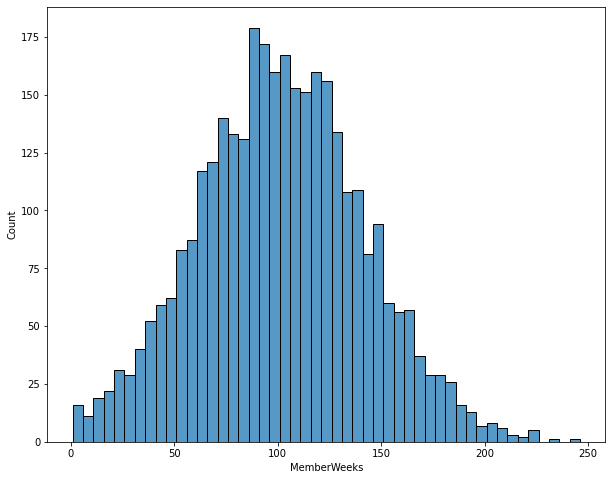

In [22]:
# seaborn을 이용해 그래프를 보기좋게 만들기

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(telco.MemberWeeks, ax=ax, binwidth=5)

가입기간(주) 90~100 구간이 가장 많이 분포되어 있는 것을 확인할 수 있다.

전체적으로 봤을 때는 가입한 후 130주 후부터 탈퇴자가 많아지고 200주 이상 가입을 지속하는 고객이 많이 없다는 것을 알 수 있다.

In [23]:
# 데이터사용량(GB)

telco.DataAmount.value_counts(dropna=False)

0.000000    1813
0.310059      41
0.209961      39
0.290039      36
0.260010      34
            ... 
1.049805       1
1.400391       1
4.238281       1
4.019531       1
4.730469       1
Name: DataAmount, Length: 174, dtype: int64

In [24]:
# 월평균전화량(분)

telco.CalMins.value_counts(dropna=False)

179.250    10
206.250    10
175.750    10
193.750    10
143.250     9
           ..
237.500     1
195.500     1
186.500     1
192.875     1
294.750     1
Name: CalMins, Length: 1434, dtype: int64

In [25]:
# 월평균요금

telco.MonthlyFee.value_counts(dropna=False)

50.00000     84
46.00000     75
45.00000     74
49.00000     73
54.00000     72
             ..
47.90625      1
96.31250      1
57.59375      1
46.50000      1
105.18750     1
Name: MonthlyFee, Length: 627, dtype: int64

위의 데이터 모두 연속형 수치 데이터로 분포를 확인하기 위해서 다양한 그래프를 그려보기로 한다.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<AxesSubplot:xlabel='MonthlyFee'>

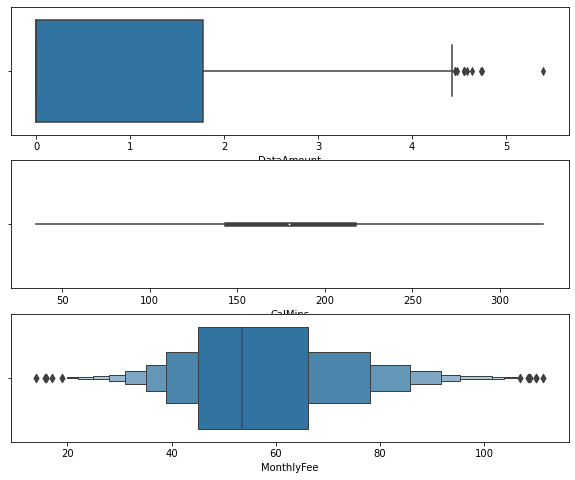

In [26]:
# 연속형 데이터의 분포를 한번에 확인하기
# boxplot은 데이터 사용량 분포를
# violinplot은 월평균전화량(분) 분포를
# boxenplot은 월평균요금 분포를 보여준다

fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
sns.boxplot(x=telco.DataAmount, ax=axs[0])
sns.violinplot(x=telco.CalMins, ax=axs[1])
sns.boxenplot(x=telco.MonthlyFee, ax=axs[2])

첫 번째 그래프를 보면 데이터 사용량은 0~1.8기가 정도가 가장 많은 분포를 보이며

두 번째 그래프를 보면 월평균 통화량(분)은 140분~220분 정도가 가장 많은 분포를 보이고

세 번째 그래프를 보면 월평균 요금은 45 이상 65 이하 정도에서 가장 많이 분포되어 있다.

In [27]:
# SciPy의 kstest를 사용해 정규성 검정을 통해 가입기간 데이터가 정규분포를 띄고 있는지 확인
# kstest 에서 p-value 가 0.05 이하라면, 데이터는 정규분포가 아니다.
from scipy import stats
stats.kstest(telco.MemberWeeks, cdf='norm')

KstestResult(statistic=0.9959498319413672, pvalue=0.0)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  1,   1,   1, ..., 225, 232, 243], dtype=int16)),
 (39.82425569380445, 101.06480648064806, 0.9992452975727015))

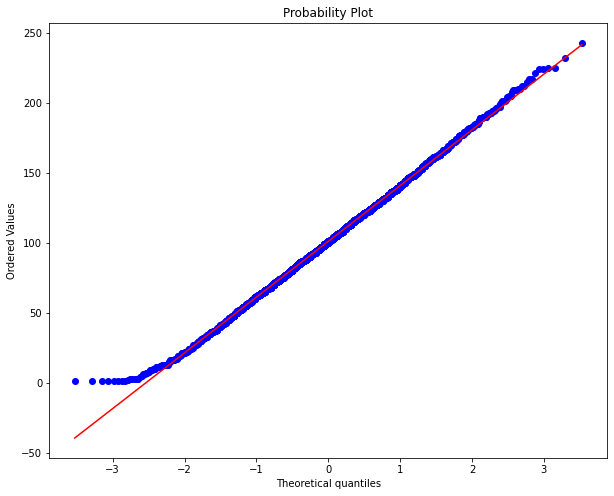

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(telco.MemberWeeks, plot=ax)

In [29]:
# 월평균요금 데이터가 정규분포를 띄고 있는지 확인

from scipy import stats
stats.kstest(telco.MonthlyFee, cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([ 14. ,  15.7,  16. , ..., 110. , 110. , 111.3], dtype=float16)),
 (16.20416823375473, 56.3125, 0.9856714377251242))

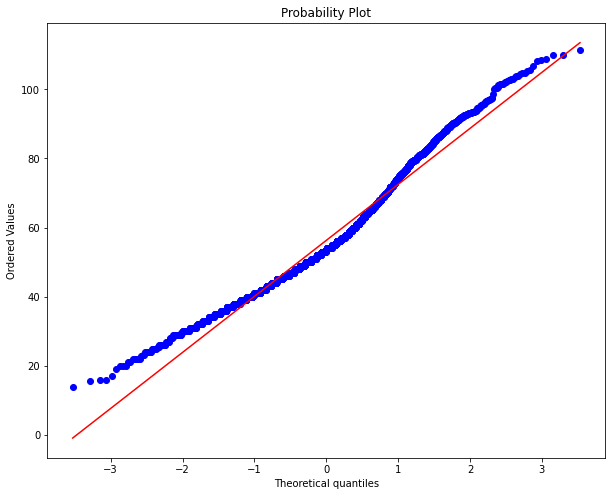

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(telco.MonthlyFee, plot=ax)

In [31]:
# 그룹화와 집계함수를 이용해 가입갱신자 와 비갱신자의 평균 데이터사용량을 구해보자
# NewContract = 가입갱신여부, 1이면 갱신, 0이면 비갱신
(
    telco
    .groupby('NewContract')
    .agg({'DataAmount':'mean'})
)

,DataAmount
NewContract,
0,0.891113
1,0.808594


갱신사용자가 비갱신사용자보다 평균 월데이터사용량이 낮은 것을 알 수 있다.

In [33]:
# 데이터요금제 가입자별 월평균전화수 또는 월평균전화량의 합과 평균 구하기
# CalCounts = 월평균전화수(횟수), CalMins = 월평균전화량(분)
# IsData = 데이터요금제사용여부, 1이면 사용, 0이면 미사용

(
    telco
    .groupby(['IsData'])
    [['CalCounts', 'CalMins']]
    .agg(['sum', 'mean'])
)

CalCounts             CalMins         
             sum        mean     sum     mean
IsData                                       
0       242482.0  100.573206     inf  179.875
1        92270.0  100.075922     inf  179.625

CalCounts = 월평균전화수(횟수)의 sum(합)과 mean(평균)을 보면 평균은 비슷하나

합계값이 데이터요금제 미사용자가 훨씬 많음을 알 수 있다.

또 데이터요금제에 가입한 사람과 가입하지 않은 사람들의 통화량과 통화횟수는 크게 차이가 없는 것으로 보인다. 

In [34]:
# 가입자와 해지자의 가입기간의 합과 평균 그리고 월평균요금의 최대값과 최소값 찾기
# Leave = 가입해지여부, 1이면 해지자, 0이면 가입자
# MemberWeeks = 가입기간, MonthlyFee = 월평균요금

(
    telco
    .groupby(['Leave'])
    .agg(weeks_sum=pd.NamedAgg(column='MemberWeeks', aggfunc='sum'),
         weeks_mean=pd.NamedAgg(column='MemberWeeks', aggfunc='mean'),
         MonthlyFee_min=pd.NamedAgg(column='MonthlyFee', aggfunc='min'),
         MonthlyFee_max=pd.NamedAgg(column='MonthlyFee', aggfunc='max'))
    .astype(int)
    .reset_index()
)

,Leave,weeks_sum,weeks_mean,MonthlyFee_min,MonthlyFee_max
0,0,287262,100,15,111
1,1,49587,102,14,110


가입해지자와 가입자의 가입기간 평균을 봤을 때 가입해지자의 가입기간이 더 높은 것으로 보아 가입기간이 오래되면 해지하는 것으로 생각된다.

그리고 가입자와 해지자의 월평균 요금의 가장 큰값과 작은 값을 살펴보았을 때 두 부류 모두 비슷한 경향을 띄고 있다.

In [37]:
# 범주 간 연속값 비교하기
# 위에서 본 가입해지자와 가입자를 가지고 연속값을 간진 컬럼들을 비교하려고 한다.
# 비교할 컬럼은 MemberWeeks(가입기간), CalMins(월평균통화량), CalCounts(월평균통화횟수), MonthlyFee(월평균요금) 이다.

telco_leave = (
                    telco
                    .groupby(['Leave'])
                    [['MemberWeeks', 'CalMins', 'CalCounts', 'MonthlyFee']]
                    .agg(['mean', 'std'])
)
telco_leave

MemberWeeks            CalMins              CalCounts             \
             mean       std     mean        std        mean        std   
Leave                                                                    
0      100.793684  39.88235  175.125  50.182058  100.283158  19.801157   
1      102.664596  39.46782  206.875  68.997679  101.335404  21.582307   

      MonthlyFee             
            mean        std  
Leave                        
0        55.8125  16.439384  
1        59.1875  16.065946

<AxesSubplot:>

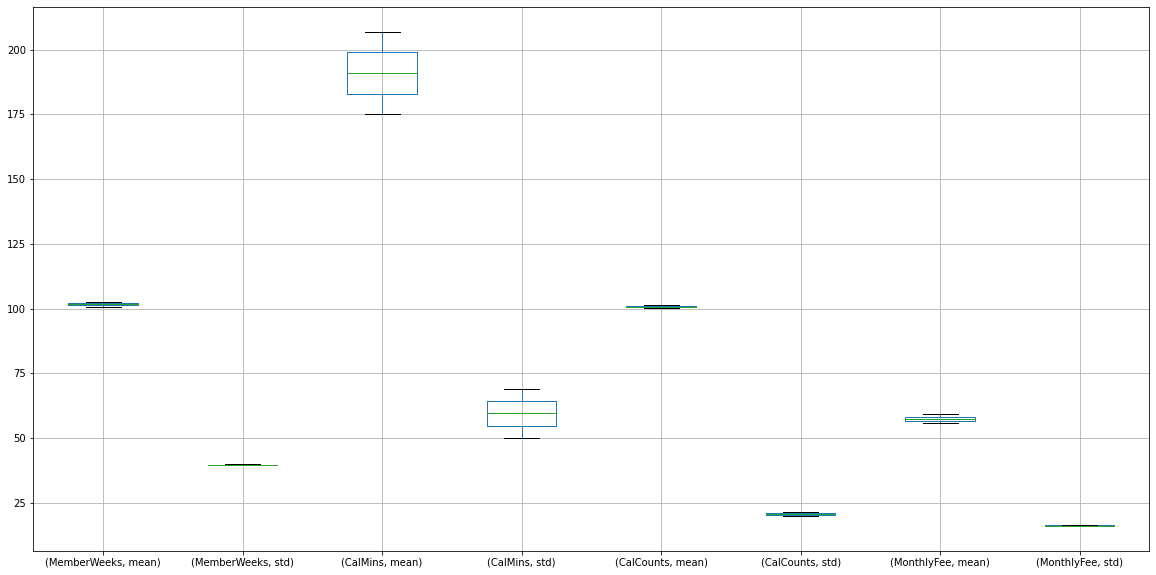

In [46]:
# 위 내용을 박스 플롯으로 비교

telco_leave.boxplot(figsize = (20, 10))

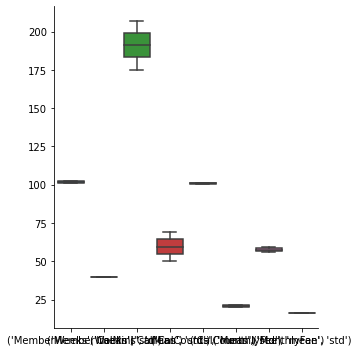

In [43]:
sns.catplot(data = telco_leave, kind='box')

여러개의 박스 플롯을 비교하면 편리하다는 장점이 있지만 이렇게 각 그룹의 데이터의 샘플 사이즈가 달라서 제대로된 결과를 도출할 수 없다.

In [47]:
# 상관 관계를 비교하여 어느 컬럼이 서로에게 영향을 주는지 알아보고자 한다.
# 먼저 공분산 확인

# 가입해지여부와 가입기간의 공분산
telco.Leave.cov(telco.MemberWeeks)

0.2319023018748452

In [48]:
# 데이터 사용량과 데이터 요금제 가입여부의 공분산

telco.DataAmount.cov(telco.IsData)

0.538635571020359

<AxesSubplot:>

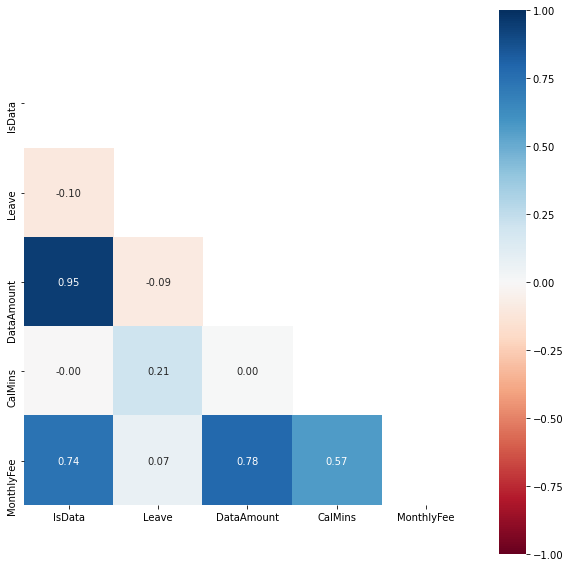

In [54]:
# 여러 변수의 상관 관계를 그래프로 표현
# 상관 관계를 비교할 컬럼은 데이터요금제 가입여부, 가입 해지여부, 월 평균 데이터사용량, 월 평균 통화량, 월 평균 요금이다.

fig, ax = plt.subplots(figsize=(10, 10))
corr = telco[['IsData', 'Leave', 'DataAmount', 'CalMins', 'MonthlyFee']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
)


상관관계 그래프를 그려본 결과

데이터 요금제 가입여부와 월 데이터 사용량 평균에 대해 뚜렷한 상관 관계를 보이고 있고,

데이터 요금제 가입여부와 월 평균 요금 / 월 평균 데이터 사용량과 월 평균 요금에 대한 상관 관계도 높은 수치를 나타낸다.

그리고 월 평균 통화량과 월 평균 요금에 대한 상관관계도 어느정도 있는 것으로 나타난다.

나머지는 서로 관계가 없거나 수치가 미미하다.

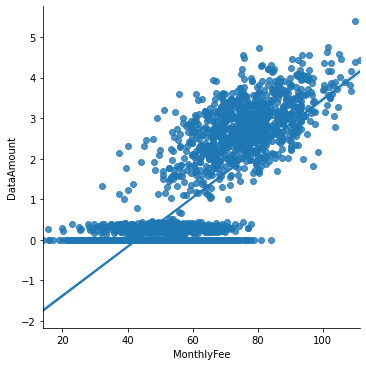

In [58]:
# 상관관계의 산포도와 회귀선 그리기
# 위에서 높은 수치로 나온 상관관계의 컬럼 들을 가지고 산포도와 회귀선을 그려보려고 한다.
# 월 평균 요금과 월 데이터 사용량의 비교 산포도 이다.

res = sns.lmplot(
 x='MonthlyFee', y='DataAmount', data=telco
)

앞서 그린 상관관계 그래프에서 상관관계가 있다고 결과가 나왔는데

산포도를 그려보니 데이터 사용량이 0~1기가 인 경우는 월 평균 요금과 상관이 없는 것으로 퍼져서 분포되어 보인다.

즉 월 평균 데이터 사용량이 1기가 이상부터 월 평균 요금에 영향을 준다고 볼 수 있다.

<AxesSubplot:xlabel='NewContract', ylabel='count'>

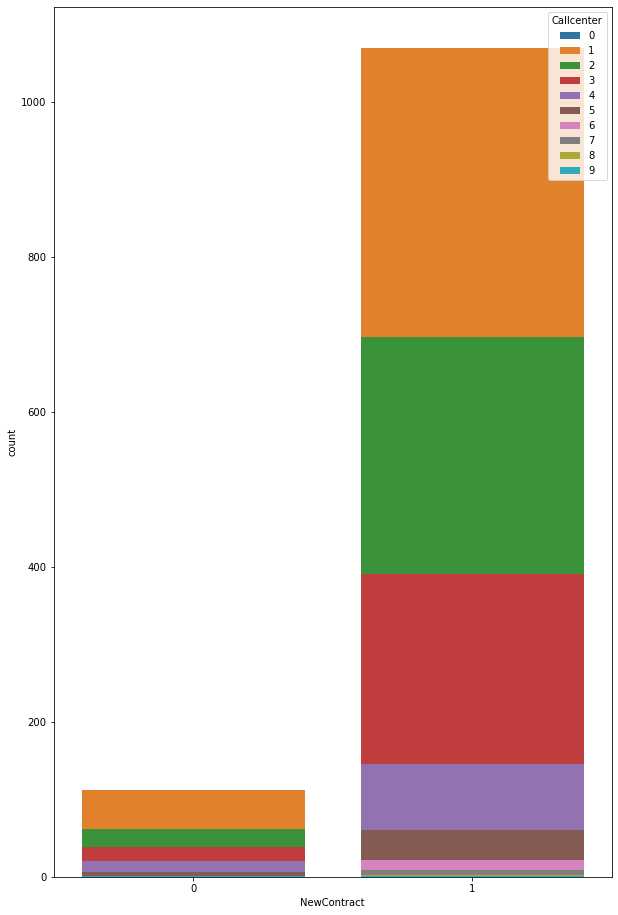

In [65]:
# 마지막으로 누적 막대 그래프를 이용해 갱신자와 비갱신자의 고객센터 통화수를 보여주는 시각화를 해보려고 한다.

fig, ax = plt.subplots(figsize=(10, 16))
sns.countplot(
 x='NewContract',
 hue='Callcenter',
 data=telco,
 dodge=False
)

<AxesSubplot:xlabel='NewContract'>

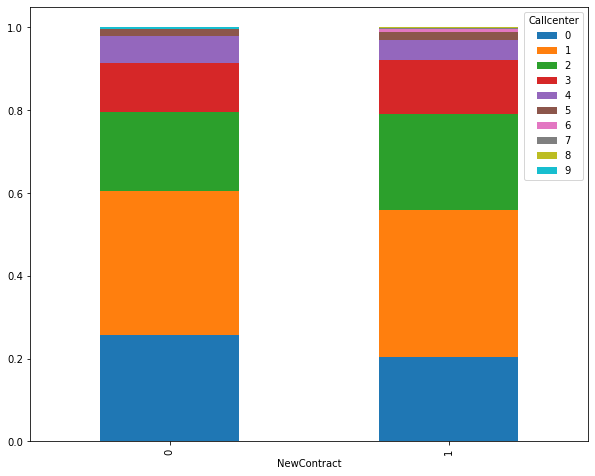

In [66]:
# 비율을 고정시킨 막대그래프

fig, ax = plt.subplots(figsize=(10, 8))
(
 telco.pipe(
 lambda df_: pd.crosstab(df_.NewContract, df_.Callcenter)
 )
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax)
)

갱신자와 비갱신자의 수가 차이가 나서 비교가 쉽지않아 비율을 비교하는 그래프를 그려보았다.

그래프 결과 갱신자와 비갱신자의 고객센터 통화수는 비슷하게 분포되어 있는 것으로 보인다.

다만, 비갱신자의 소수의 사람들이 9회 이상의 통화수를 기록한 것으로 보여지고

갱신자에서는 6회 이상 전화를 건 사람들은 별로 없는 것으로 나타난다.

-------------------------------------------------------------
## 4. 결론

### 데이터를 분석한 결과 및 의견


1. 가입한 후 130주 후부터 탈퇴자가 많아지고 200주 이상 가입을 지속하는 고객이 많이 없다는 것
- 그를 해결하기 위해 장기 가입자들의 혜택을 늘려 가입을 더 오래 지속시킬 수 있도록 해야한다.


2. 데이터 요금제를 가입한 사람들은 가입하지 않은 사람들보다 더 많은 데이터를 사용한다.
- 데이터 요금제를 더 많이 가입시키기 위해 좀 더 다양한 요금제의 마련이 필요한 것으로 보인다.


3. 월 데이터 사용량과 월 통화량이 많을 수록 월 평균 요금이 올라간다.
- 당연한 부분이지만 해당 분포도를 확인한 결과 데이터를 적게 사용하는 사람들도 평균 요금이 높은 경우가 많이 있었다. 그뜻은 적은 데이터를 사용하고 많은 통화량을 쓴다는 의미로 데이터 요금제와 통화 요금제를 고객들이 원하는대로 골라 합해서 들 수 있는 요금제를 마련하면 좋을 것 같다.  


------------------------------------------------------------
이상으로 프로그래밍3 기말 과제를 마치겠습니다. 감사합니다.